In [1]:
!pip3 install -q ipython-autotime
%load_ext autotime

time: 402 µs (started: 2024-10-29 08:05:49 +00:00)


In [2]:
#Import Block
import librosa
from matplotlib import pyplot as plt
import numpy as np
import os

time: 11.5 ms (started: 2024-10-29 08:05:49 +00:00)


In [3]:
DURATION = 8.18
SAMPLING_RATE = 16000
CHUNK_SAMPLES = int(DURATION * SAMPLING_RATE)

time: 558 µs (started: 2024-10-29 08:05:49 +00:00)


In [4]:
audio_clips = []
labels = []
for clip in os.listdir('/kaggle/input/indian-music-raga/'):
    y,_ = librosa.load(f'/kaggle/input/indian-music-raga/{clip}', mono=True, sr=SAMPLING_RATE)
    chunks = [y[i:i + CHUNK_SAMPLES] for i in range(0, len(y), CHUNK_SAMPLES)]
    valid_chunks = [chunk for chunk in chunks if chunk.shape == (130880,)]
    labels += ([clip.split('.')[0][:-2]] * len(valid_chunks))
    audio_clips += valid_chunks

time: 38.8 s (started: 2024-10-29 08:05:49 +00:00)


In [5]:
labels[labels == 'bhairavi'] = 'Bhairavi'
labels[labels == 'asavari'] = 'Asawari'
labels[labels == 'bageshree'] = 'Bageshree'
labels[labels == 'bhoop'] = 'Boopali'
labels[labels == 'bhoopali'] = 'Boopali'
labels[labels == 'darbari'] = 'Darbari Kanada'
labels[labels == 'DKanada'] = 'Darbari Kanada'
labels[labels == 'malkauns'] = 'Malkauns'
labels[labels == 'sarang'] = 'Vrindavani Sarang'
labels[labels == 'yaman'] = 'Yaman'

time: 1.12 ms (started: 2024-10-29 08:06:28 +00:00)


In [6]:
# DURATION = 8.18
# # x, _ = librosa.load("../TestingMusic/Sine500.wav", mono=True, sr=44100)
# x, _ = librosa.load("/kaggle/input/indian-music-raga/Bhairavi01.wav", mono=True, sr=44100, duration=DURATION)
# x = librosa.resample(x, orig_sr=44100, target_sr=16000)

time: 461 µs (started: 2024-10-29 08:06:28 +00:00)


In [7]:
data = []
N_FFT = 1024
for clip in audio_clips:
    if (len(clip) < N_FFT): continue
    S = np.abs(librosa.stft(
        clip,
        n_fft=N_FFT,
    ))
    
    S = S[:512, :]
    data.append(S)
data = np.array(data)

time: 12.1 s (started: 2024-10-29 08:06:28 +00:00)


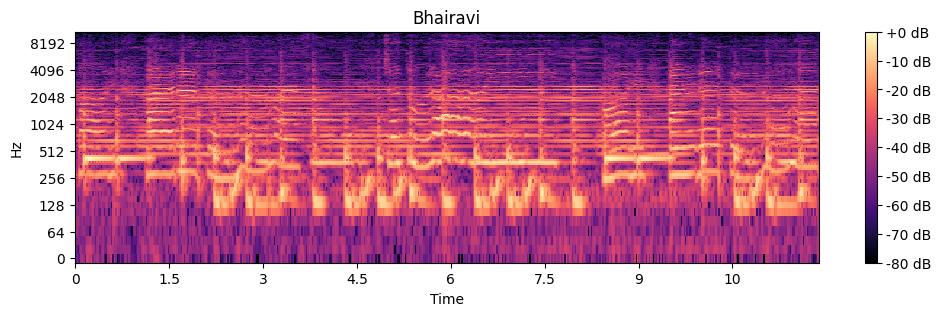

time: 990 ms (started: 2024-10-29 08:06:40 +00:00)


In [8]:
# S = np.abs(librosa.stft(
#     x,
#     n_fft=1024,
# ))
# S = S[:512, :]
sample_num = 1000
S = data[sample_num]

fig, ax = plt.subplots()
img = librosa.display.specshow(
    librosa.amplitude_to_db(S, ref=np.max),
    y_axis='log',
    x_axis='time',
    ax = ax
)

ax.set_title(labels[sample_num])
fig.colorbar(img, ax=ax, format="%+2.0f dB")
fig.set_size_inches(12, 3)

In [9]:
np.save('spectral_data.npy', data)
np.save('labels_data.npy', labels)

time: 1.26 s (started: 2024-10-29 08:06:41 +00:00)


In [10]:
!zip -r raga_spectrograms_data.zip /kaggle/working
from IPython.display import FileLink
FileLink(r'raga_spectrograms_data.zip')

  adding: kaggle/working/ (stored 0%)
  adding: kaggle/working/spectral_data.npy (deflated 9%)
  adding: kaggle/working/labels_data.npy (deflated 99%)
  adding: kaggle/working/__notebook__.ipynb (deflated 27%)


/kaggle/working/raga_spectrograms_data.zip

time: 1min 35s (started: 2024-10-29 08:06:42 +00:00)
